In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

#### Preliminary data exploration

In [2]:
df_data = pd.read_csv("nobel_prize_data.csv")
print(f"dataset has a shape of {df_data.shape}")
df_data.head(3)

dataset has a shape of (962, 16)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL


In [3]:
df_data.tail(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [5]:
# In which year was nobel peize first awarded?
df_data.sort_values('year').head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA


The nobel prize was first warded in the year **1901**

In [6]:
# Which year is the latest year
df_data.sort_values('year', ascending=False).head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA


The latest year is **2020**

#### Are there any duplicates?

In [7]:
df_data.duplicated().values.any()

np.False_

There are no duplicates

#### Check for NaN

In [8]:
df_data.isna().values.any()

np.True_

True. We have some empty dataset

In [9]:
# How many NaN values are there per column?
print(df_data.isna().sum())
df_data.sample(3)

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
319,1959,Peace,The Nobel Peace Prize 1959,NaN,1/1,Individual,Philip J. Noel-Baker,1889-11-01,London,United Kingdom,United Kingdom,Male,NaN,NaN,NaN,GBR
231,1946,Physics,The Nobel Prize in Physics 1946,"""for the invention of an apparatus to produce ...",1/1,Individual,Percy Williams Bridgman,1882-04-21,"Cambridge, MA",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA
718,2000,Physics,The Nobel Prize in Physics 2000,"""for basic work on information and communicati...",1/4,Individual,Zhores I. Alferov,1930-03-15,Vitebsk,Union of Soviet Socialist Republics (Belarus),Belarus,Male,A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia,BLR


Notice that our **birth_date** column has an **Object** datatype instead of **DateTime**, Lets convert it to **DateTime**

In [10]:
df_data.birth_date = pd.to_datetime(df_data['birth_date'])
df_data.birth_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 962 entries, 0 to 961
Series name: birth_date
Non-Null Count  Dtype         
--------------  -----         
934 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.6 KB


#### Add a Column called share_pct which has the laureates' share as a percentage in the form of a floating-point number

In [11]:
seperated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(seperated_values[0])
denominator = pd.to_numeric(seperated_values[1])

df_data['share_pct'] = numerator/denominator

print(df_data.info())
df_data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.0


#### Create a donut chart using plotly which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [12]:
total_price_by_sex = df_data.groupby('sex').count()['prize']
total_price_by_sex

sex
Female     58
Male      876
Name: prize, dtype: int64

In [13]:
# Show on a donut chart
fig = px.pie(labels=total_price_by_sex.index, values=total_price_by_sex.values, names=total_price_by_sex.index, hole=0.6)
fig.show()

6.21 percent went to women

#### What are the names of the first 3 female Nobel laureates?

#### What did the win the prize for?

#### What do you see in their birth_country? Were they part of an organisation?

In [14]:
first_3_females = df_data.sort_values('year').loc[df_data.sex == 'Female'].head(3)

print(f"* The first 3 female Nobel laureates are: \n{first_3_females.full_name}")
print(f"\n* They won: \n{first_3_females.prize}")
print(f"\n* Their birth countries are: \n{first_3_females.birth_city}")
print(f"\n* Their orrganisations: \n{first_3_females.organization_name}")

first_3_females.head(3)

* The first 3 female Nobel laureates are: 
18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

* They won: 
18       The Nobel Prize in Physics 1903
29            The Nobel Peace Prize 1905
51    The Nobel Prize in Literature 1909
Name: prize, dtype: object

* Their birth countries are: 
18      Warsaw
29      Prague
51    Mårbacka
Name: birth_city, dtype: object

* Their orrganisations: 
18    NaN
29    NaN
51    NaN
Name: organization_name, dtype: object


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


They were not part of any organisation

#### Did some people get a Nobel Prize more than once? If so, who were they?

In [15]:
df_data.groupby('full_name').count().sort_values("prize", ascending=False)['prize']

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Youyou Tu                                                                            1
Yuan T. Lee                                                                          1
Yves Chauvin                                                                         1
Zhores I. Alferov                                                                    1
Adolfo Pérez Esquivel                                                                1
Name: prize, Length: 955, dtype: 

Comité international de la Croix Rouge (International Committee of the Red Cross) won more prizes

#### In how many categories are prizes awarded?

#### Create a plotly bar chart with the number of prizes awarded by category.

#### Use the color scale called Aggrnyl to colour the chart, but don't show a color axis.

#### Which category has the most number of prizes awarded?

#### Which category has the fewest number of prizes awarded?



In [16]:
# How many categories are prizes awarded?
df_data.category.nunique()

6

In [17]:
prize_by_category = df_data.groupby('category').count()['prize']
prize_by_category

category
Chemistry     186
Economics      86
Literature    117
Medicine      222
Peace         135
Physics       216
Name: prize, dtype: int64

In [18]:
fig = px.bar(x=prize_by_category.index, y=prize_by_category.values, title='Number of prizes awarded by category', color=prize_by_category.values, color_continuous_scale='Aggrnyl')
fig.update_layout(xaxis_title='Categories', yaxis_title='Number of Prices', coloraxis_showscale=False)
fig.show()

**Medecine** has the most number of awarded and **Economics** has the fewest nuber of awarded prices

#### When was the first prize in the field of Economics awarded?

#### Who did the prize go to?

In [19]:
econs_prize_category = df_data.sort_values('year').loc[df_data.category == "Economics"]
econs_prize_category.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.5


It was first awarded in the year 1969 to **Jan Tinbergen**

#### Create a plotly bar chart that shows the split between men and women by category.

In [20]:
# Categories by sex
cat_men_women = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women.head()

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90


In [21]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace

#### Using Matplotlib to Visualise Trends over Time

In [22]:
# Count the number of prize awarded every year
prizes_per_year = df_data.groupby('year').count()['prize']
prizes_per_year.head()

year
1901    6
1902    7
1903    7
1904    6
1905    5
Name: prize, dtype: int64

Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).

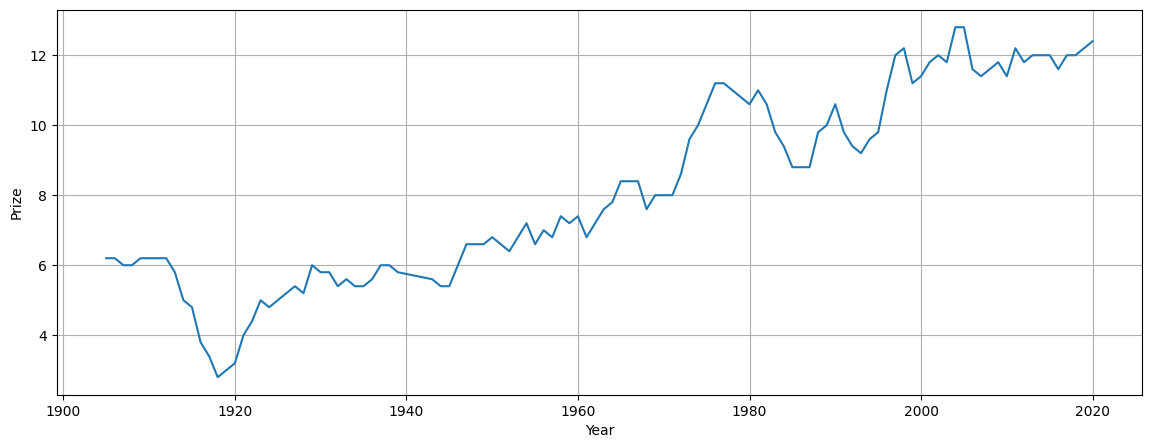

In [23]:
roll_df = prizes_per_year.rolling(window=5).mean()
plt.figure(figsize=(14,5))
plt.xlabel('Year')
plt.ylabel('Prize')
plt.grid()

plt.plot(prizes_per_year.index, roll_df.values)
plt.show()

superimpose the rolling average on a scatter plot.

Show a tick mark on the x-axis for every 5 years from 1900 to 2020. 

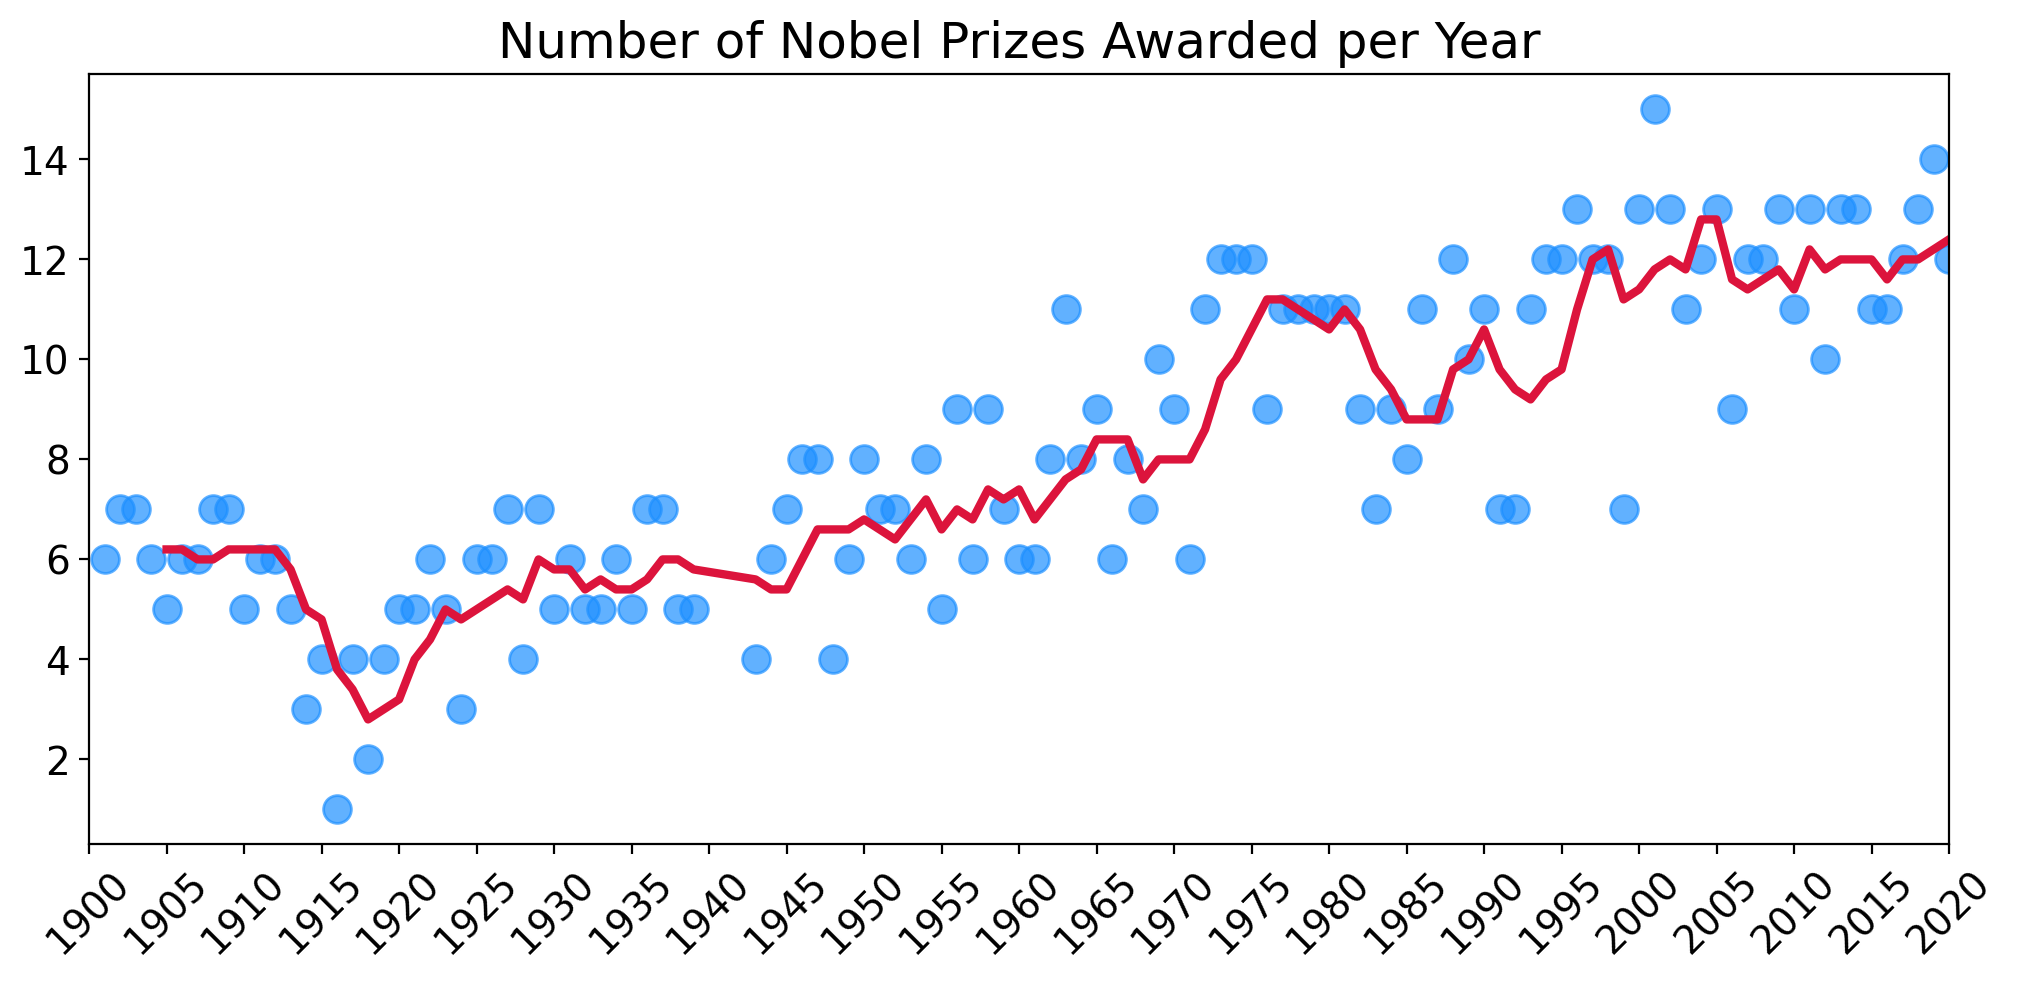

In [24]:
plt.figure(figsize=(12,5), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prizes_per_year.index, 
           y=prizes_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(prizes_per_year.index, 
        roll_df.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

Calculate the average prize share of the winners on a year by year basis.

In [25]:
share_pct_per_year =  df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_pct_per_year

,share_pct
year,
1901,0.833333
1902,0.714286
1903,0.714286
1904,0.833333
1905,1.000000
...,...
2016,0.545455
2017,0.500000
2018,0.461538


Calculate the 5 year rolling average of the percentage share

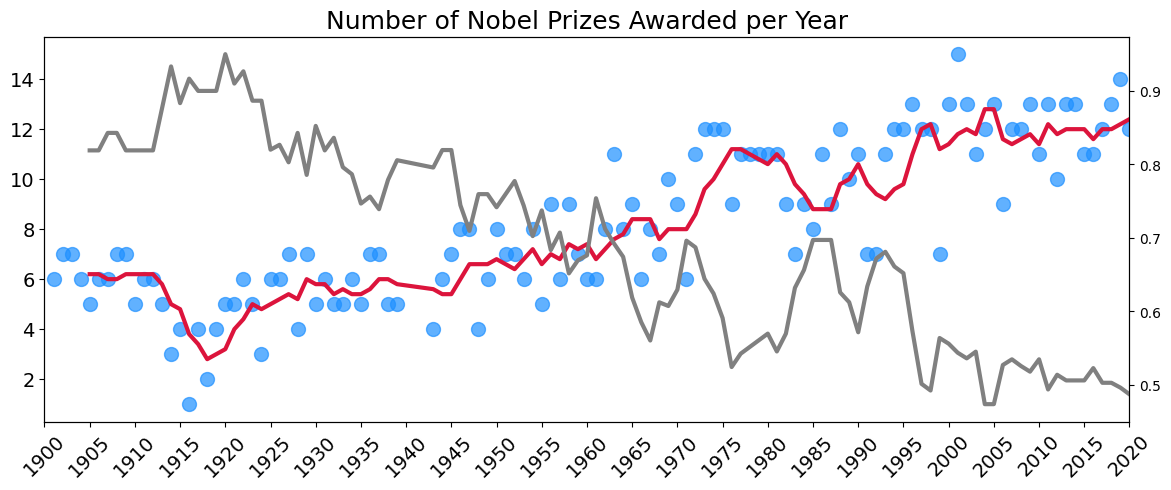

In [26]:
roll_df2 = share_pct_per_year.rolling(window=5).mean()

plt.figure(figsize=(14,5))

plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prizes_per_year.index, 
           y=prizes_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prizes_per_year.index, 
        roll_df.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prizes_per_year.index, 
        roll_df2.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

To see the relationship between the number of prizes and the laureate share even more clearly we can invert the second y-axis.

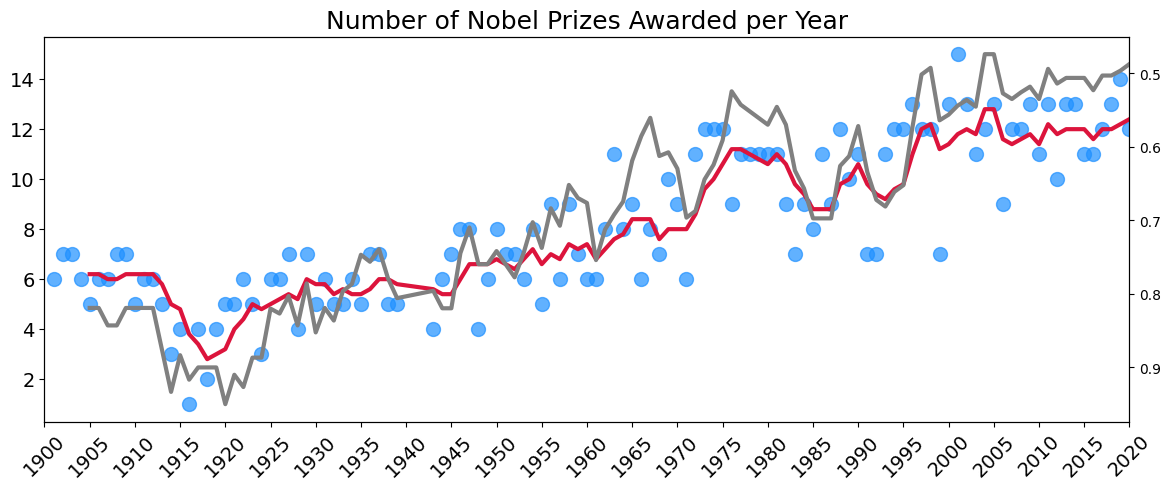

In [27]:
plt.figure(figsize=(14,5))

plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

# Can invert axis
ax2.invert_yaxis()

ax1.scatter(x=prizes_per_year.index, 
           y=prizes_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prizes_per_year.index, 
        roll_df.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prizes_per_year.index, 
        roll_df2.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

#### A Choropleth Map and the Countries with the Most Prizes

Create a Pandas DataFrame called top20_countries that has the two columns. The prize column should contain the total number of prizes won.

In [28]:
top_countries = df_data.groupby('birth_country_current').agg({'prize': pd.Series.count})
top_20_countries = top_countries.sort_values('prize')[-20:]
top_20_countries

,prize
birth_country_current,
India,9
Hungary,9
South Africa,9
Australia,10
Denmark,12
China,12
Norway,12
Austria,18
Netherlands,18


 use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after

In [29]:
fig = px.bar(x=top_20_countries.prize,
             y=top_20_countries.index, 
             orientation='h',
             title='Top 20 Countries by Number of Prizes',
            color=top_20_countries.prize,
            color_continuous_scale = 'Viridis')

fig.update_layout(xaxis_title='Number of prizes',
                  yaxis_title='Country',
                 coloraxis_showscale=False)
fig.show()

Create a choropleth map

In [30]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

# plot the choropleth map
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

 Country Bar Chart with Prize Category

In [31]:
cat_country = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values('prize', ascending=False, inplace=True)
cat_country.head()

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28


In [32]:
'''Next, we can merge the DataFrame above with the top20_countries DataFrame that we created previously.
That way we get the total number of prizes in a single column too. This is important since we want to control 
the order for our bar chart.'''

merged_df = pd.merge(cat_country, top_20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)

merged_df.head()

,birth_country_current,category,cat_prize,total_prize
61,South Africa,Medicine,3,9
55,Hungary,Chemistry,3,9
58,South Africa,Peace,3,9
81,Hungary,Medicine,2,9
105,Hungary,Economics,1,9


In [33]:
# Create bar chart

In [34]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()




 Country Prizes over Time

In [35]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year.head()

,year,birth_country_current,prize
312,1901,Netherlands,1
346,1901,Poland,1
118,1901,France,2
159,1901,Germany,1
440,1901,Switzerland,1


In [36]:
# Then we can create a series that has the cumulative sum for the number of prizes won.
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
cumulative_prizes.head()

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3


In [37]:
# Create a line chart
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()


#### Create Sunburst Charts for a Detailed Regional Breakdown of Research Locations

Create a bar chart showing the organisations affiliated with the Nobel laureates

In [38]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
top20_orgs

organization_name
Institut Pasteur                                 7
London University                                7
Harvard Medical School                           7
University College London                        7
Cornell University                               8
Bell Laboratories                                8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Max-Planck-Institut                             13
Rockefeller University                          13
Princeton University                            15
Columbia University                             17
California Institute of Technology (Caltech)    17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of

In [39]:
top_org = df_data.groupby(['organization_name'], as_index=False).agg({'prize': pd.Series.count})
top_org.sort_values('prize', inplace=True)
top_20_org = top_org[-20:]

fig = px.bar(top_20_org,
             x='prize', y='organization_name',
             orientation='h',
            color='prize',
            color_continuous_scale=px.colors.sequential.haline)
fig.update_layout(coloraxis_showscale=False)
fig.show()

Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.

In [40]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.

In [41]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

Create a DataFrame that groups the number of prizes by organisation.

In [42]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)


burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

#### Unearthing Patterns in the Laureate Age at the Time of the Award

In [43]:
# Calculate the age of the laureate in the year of the ceremony and add this as a column called winning_age to the df_data DataFrame

birth_year = df_data.birth_date.dt.year
age = df_data.year - birth_year

df_data['winning_age'] = age
df_data.head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.0,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.0,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.0,47.0


In [44]:
df_data.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

In [45]:
# name of the youngest Nobel laureate
df_data[df_data.winning_age == 17]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.5,17.0


In [46]:
# name of the oldest Nobel laureate
df_data[df_data.winning_age == 97]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.333333,97.0


In [47]:
df_data.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

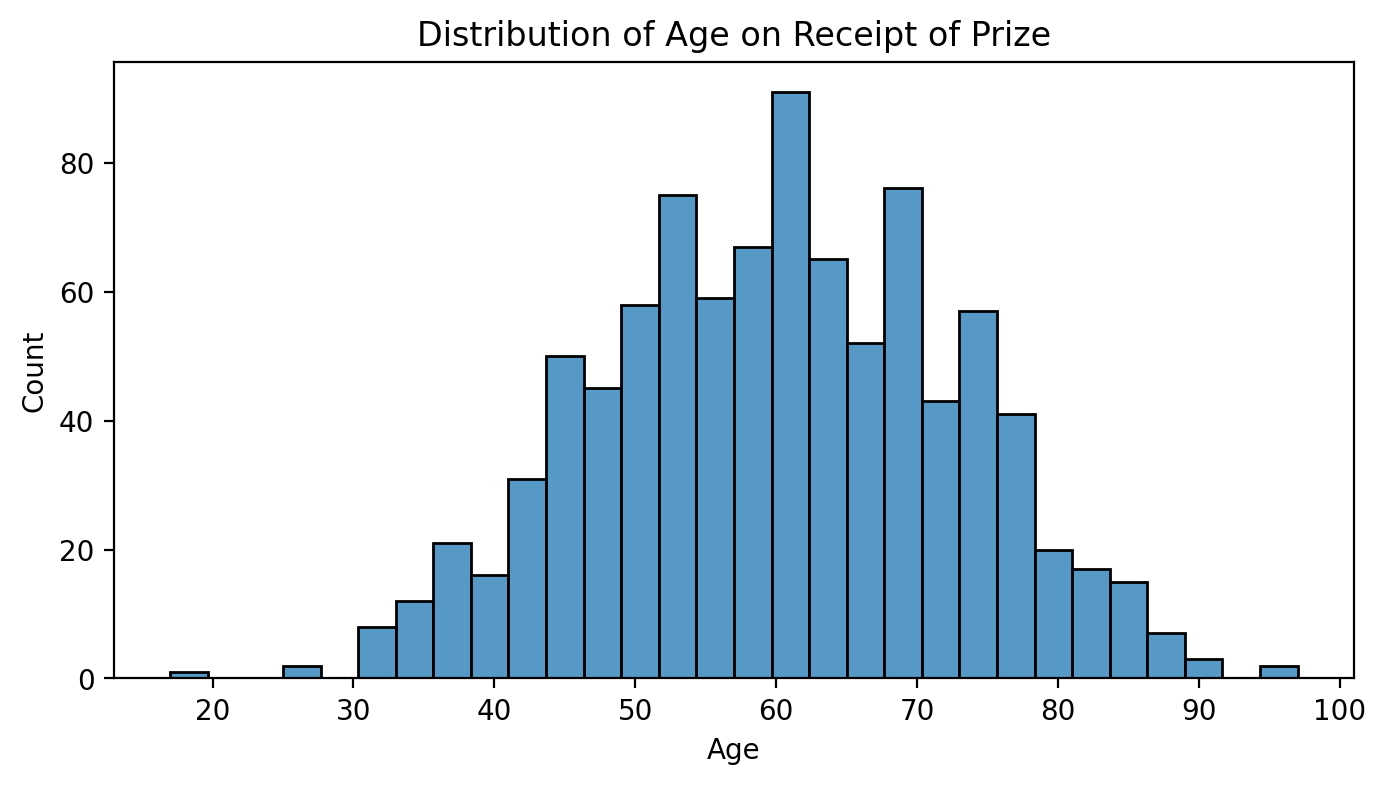

In [48]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

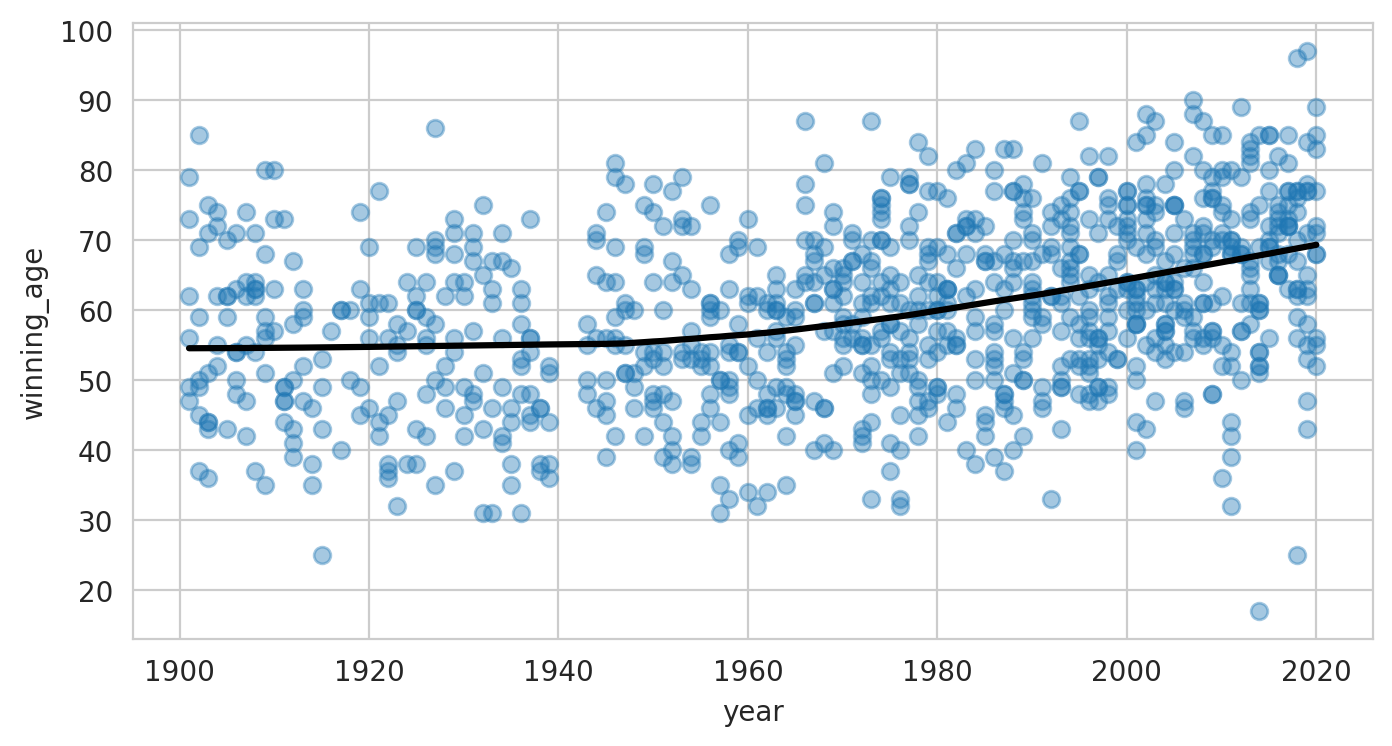

In [49]:
# Winning Age Over Time (All Categories)
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

Age Differences between Categories

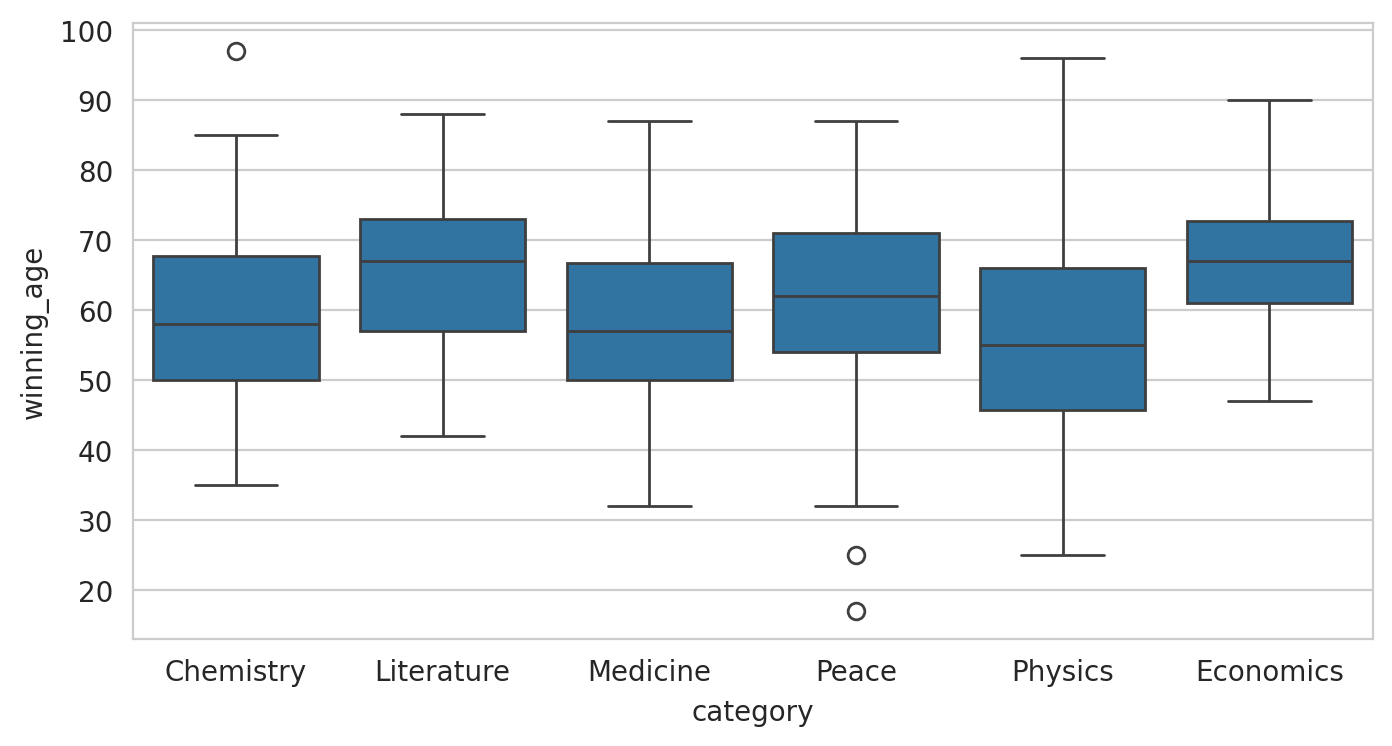

In [50]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

Laureate Age over Time by Category

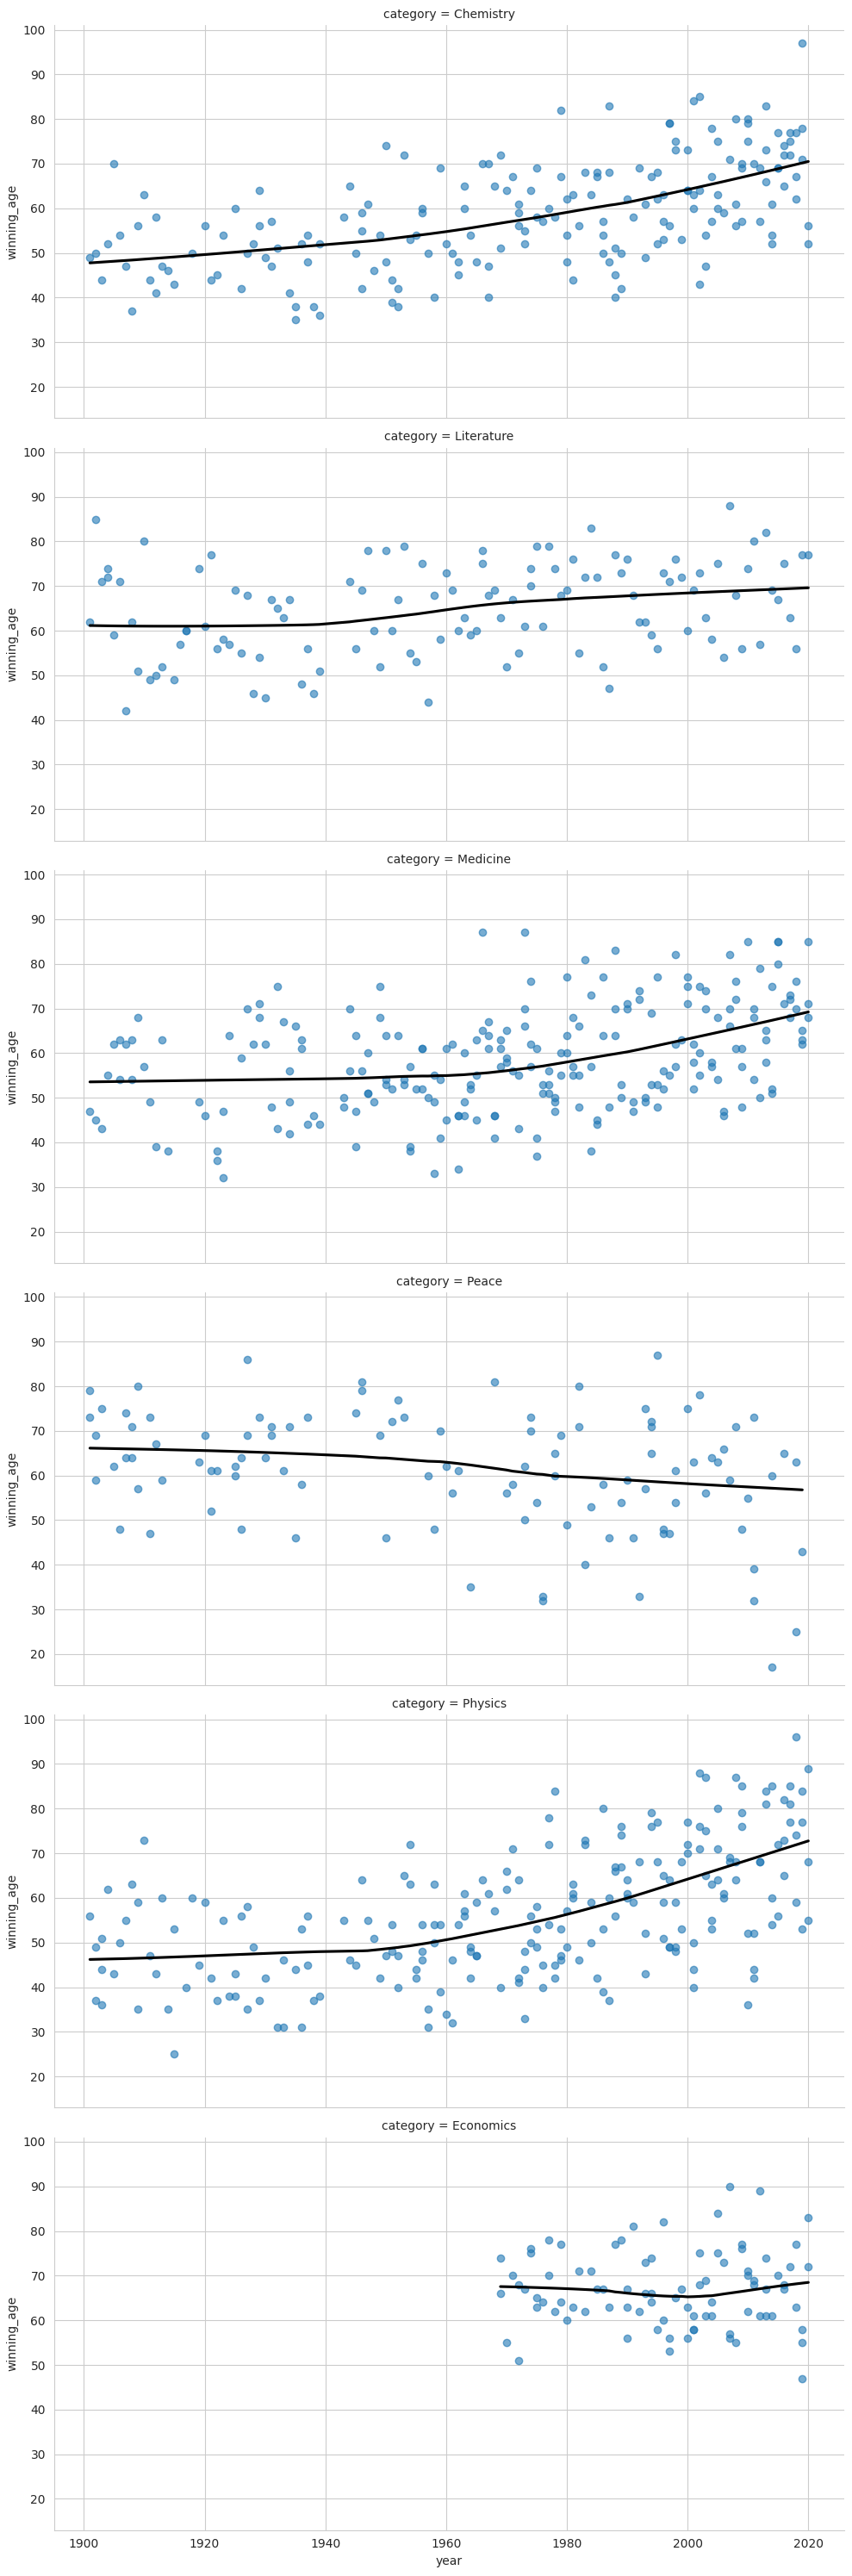

In [52]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

To combine all these charts into the same chart, we can use the hue parameter

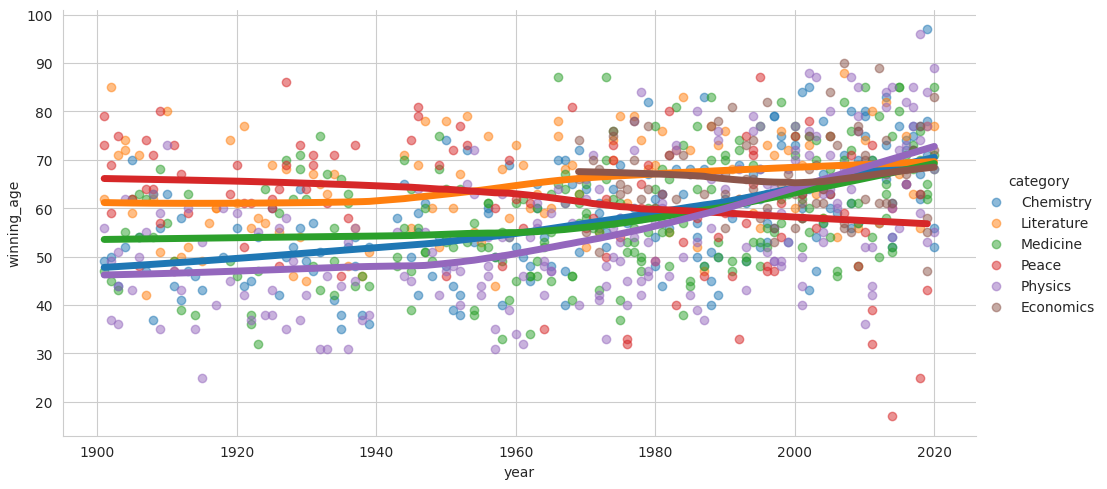

In [53]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()